# Shelter Animal Outcomes 3

## Random Forests

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv('../Shelter_train.csv')
df_test = pd.read_csv('../Shelter_test.csv')

In [3]:
x = df_train.ix[:, :-1]
y = df_train.ix[:, -1]
df_test = df_test.drop('ID', 1)

In [4]:
forest = RandomForestClassifier(n_estimators = 400, max_features='auto')
cross_validation.cross_val_score(forest, x, y, scoring="log_loss")

array([-1.44369371, -1.41770214, -1.38668389])

In [5]:
%timeit forest.fit(x, y)

1 loop, best of 3: 3.78 s per loop


In [6]:
rfecv = RFECV(estimator=forest, step=1, cv=StratifiedKFold(y, 2),
              scoring='log_loss')
rfecv.fit(x, y)
X_r = rfecv.transform(x)

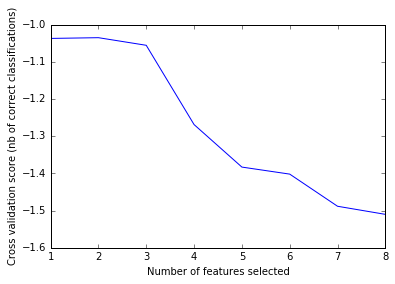

In [7]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

In [8]:
cross_validation.cross_val_score(forest, X_r, y, scoring="log_loss")

array([-1.04130289, -1.01704254, -1.00604077])

In [ ]:
%timeit rfecv.fit(x, y)

In [11]:
forest = rfecv.fit(x, y)
predictions = forest.predict_proba(df_test)
output = pd.DataFrame(predictions, columns=['Adoption', 'Died', 'Euthanasia', 'Return_to_owner', 'Transfer'])
output.index.names = ['ID']
output.index += 1
output.head()

,Adoption,Died,Euthanasia,Return_to_owner,Transfer
1,0.145946,0.010753,0.087225,0.154947,0.601128
2,0.592895,0.004122,0.032209,0.203735,0.167040
3,0.485268,0.000000,0.040206,0.310328,0.164198
4,0.087320,0.022798,0.110223,0.293940,0.485719
5,0.523867,0.000000,0.031406,0.260449,0.184278


In [12]:
output.to_csv('../submissionRF.2.0.csv', index_label = 'ID')

Submitting this got me a score of 1.12426 which put me at a ranking of 846 out of 1142 entries at the time of submission.